In [ ]:
# List of contents:
## 1. Import libraries
## 2. Import 'high_activity_customers' dataset
## 3. Merge df_active_customers and df_departments
## 4. Create customer profiles:
## 5-24. Create visualizations 
## 25. Export final dataframe


# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# allocate file path

path = r'C:\Users\admin\Desktop\10.2023 Instacart Basket Analysis'

path

'C:\\Users\\admin\\Desktop\\10.2023 Instacart Basket Analysis'

# 2. Import dataframe 

In [3]:
df_active_customers =pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'high_activity_customers.csv'))

In [4]:
df_active_customers.head()

,user_id,STATE,Age,number_of_dependants,fam_status,income,order_id,order_number,orders_day_of_week,order_hour,...,busiest_day,busiest_slowest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_flag,median_days_since_prior_order,order_frequency_flag,Region
0,59,Delaware,49,2,married,71218,78,16,1,15,...,Regularly busy,Busiest days,Most orders,37,Regular customer,7.004,Low spender,7.0,Frequent customer,South
1,27,New York,81,0,divorced/widowed,110170,66,10,1,14,...,Regularly busy,Busiest days,Most orders,30,Regular customer,8.766,Low spender,9.0,Frequent customer,Northeast
2,26,New Mexico,59,2,married,49072,-26,27,6,11,...,Regularly busy,Regularly busy,Most orders,50,Loyal customer,8.030,Low spender,6.0,Frequent customer,West
3,52,Alabama,64,2,married,40974,-30,50,2,14,...,Regularly busy,Regularly busy,Most orders,75,Loyal customer,8.120,Low spender,5.0,Frequent customer,South
4,31,Oklahoma,38,1,married,52311,79,20,0,20,...,Busiest day,Busiest days,Average orders,38,Regular customer,7.820,Low spender,8.0,Frequent customer,South


In [5]:
df_active_customers.shape

(3042409, 31)

 # 3. Import Dataframe department

In [6]:
# Import 'departments_wrangled' dataset inorder to continue with the merge

df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [7]:
# Check output

df_departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [8]:
# Change 'Unnamed:0' column name to 'department_id'

df_departments.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [9]:
# Check the output

df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


# 4. Merge df_active_customers and df_department

In [10]:
# Merge df_active_customers and df_departments on a key column 'department_id'

active_cus_dept = df_active_customers.merge(df_departments, on = 'department_id', how='inner')

In [11]:
# Check the output
active_cus_dept.shape

(3042409, 32)

In [12]:
active_cus_dept.head()

,user_id,STATE,Age,number_of_dependants,fam_status,income,order_id,order_number,orders_day_of_week,order_hour,...,busiest_slowest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_flag,median_days_since_prior_order,order_frequency_flag,Region,department
0,59,Delaware,49,2,married,71218,78,16,1,15,...,Busiest days,Most orders,37,Regular customer,7.004,Low spender,7.0,Frequent customer,South,household
1,27,New York,81,0,divorced/widowed,110170,-84,8,0,10,...,Busiest days,Most orders,44,Loyal customer,7.996,Low spender,7.0,Frequent customer,Northeast,household
2,77,New Mexico,75,1,married,122006,-102,20,2,11,...,Regularly busy,Most orders,92,Loyal customer,7.330,Low spender,4.0,Frequent customer,West,household
3,125,Nevada,26,1,married,53586,30,13,6,12,...,Regularly busy,Most orders,33,Regular customer,8.390,Low spender,10.0,Frequent customer,West,household
4,4,Arkansas,31,3,married,45435,-27,7,6,13,...,Regularly busy,Most orders,17,Regular customer,6.426,Low spender,7.0,Frequent customer,South,household


In [13]:
# To rename column names for proper identification

active_cus_dept.rename(columns = {'number_of_dependants' : 'number_of_dependents', 'fam_status' : 'family_status'}, inplace = True)

In [14]:
active_cus_dept.head()

,user_id,STATE,Age,number_of_dependents,family_status,income,order_id,order_number,orders_day_of_week,order_hour,...,busiest_slowest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_flag,median_days_since_prior_order,order_frequency_flag,Region,department
0,59,Delaware,49,2,married,71218,78,16,1,15,...,Busiest days,Most orders,37,Regular customer,7.004,Low spender,7.0,Frequent customer,South,household
1,27,New York,81,0,divorced/widowed,110170,-84,8,0,10,...,Busiest days,Most orders,44,Loyal customer,7.996,Low spender,7.0,Frequent customer,Northeast,household
2,77,New Mexico,75,1,married,122006,-102,20,2,11,...,Regularly busy,Most orders,92,Loyal customer,7.330,Low spender,4.0,Frequent customer,West,household
3,125,Nevada,26,1,married,53586,30,13,6,12,...,Regularly busy,Most orders,33,Regular customer,8.390,Low spender,10.0,Frequent customer,West,household
4,4,Arkansas,31,3,married,45435,-27,7,6,13,...,Regularly busy,Most orders,17,Regular customer,6.426,Low spender,7.0,Frequent customer,South,household


# 5. create customer profiles

In [15]:
# Defines customer profiles based on dependents, and family status.

def create_profile(row):
    if row['number_of_dependents'] > 0 and row['family_status'] == 'married':
        return 'Family with Kids'
    elif row['number_of_dependents'] > 0 and row['family_status'] == 'single':
        return 'Single with Kids'
    elif row['number_of_dependents'] == 0 and row['family_status'] == 'single':
        return 'Single No Kids'
    else:
        return 'Other'

In [16]:
# Create the customer profile column with create_profile function to active_cus_Dept Dataframe. 

active_cus_dept['Customer_Profile'] = active_cus_dept.apply(create_profile, axis=1)

In [17]:
active_cus_dept.shape

(3042409, 33)

In [18]:
# check the output

active_cus_dept['Customer_Profile'].value_counts().sort_index()

Customer_Profile
Family with Kids    2302322
Other                271561
Single No Kids       468526
Name: count, dtype: int64

# 6. create visualizations

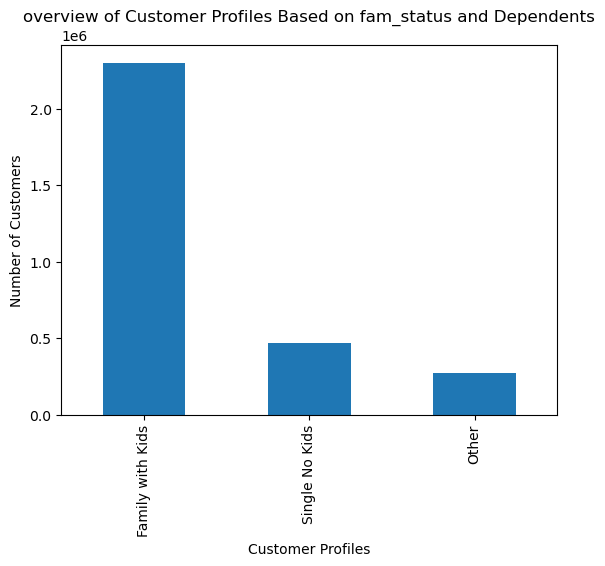

In [19]:
# Distribution of customer profiles Visualization

bar_customer_profile_distr = active_cus_dept['Customer_Profile'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Customer Profiles')
plt.ylabel('Number of Customers')
plt.title('overview of Customer Profiles Based on fam_status and Dependents')
plt.xticks(rotation=90)
plt.show()


In [20]:
# Export the customer profiles bar chart

bar_customer_profile_distr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_profile_distr.png'),bbox_inches='tight')

# 7. Create department bar chart 

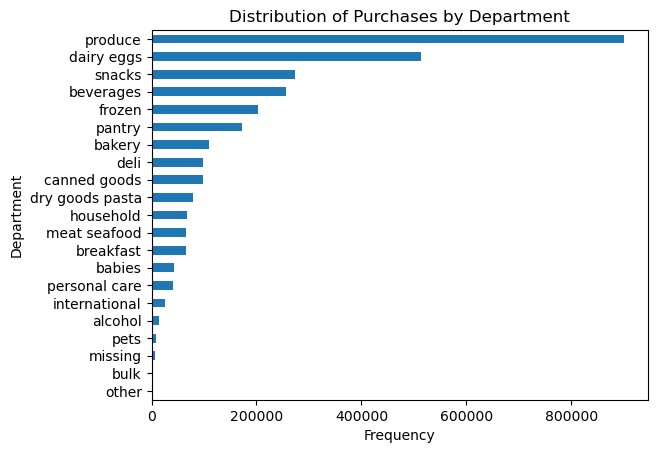

In [21]:
Bar_department = active_cus_dept['department'].value_counts().sort_values(ascending=True)

# Create a horizontal bar chart
bar = Bar_department.plot.barh()

plt.title('Distribution of Purchases by Department')
plt.ylabel('Department')  # y-axis shows departments
plt.xlabel('Frequency')   # x-axis shows frequencies

plt.show()

In [22]:
# save the figure using the figure attribute of bar

fig = bar.get_figure()
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'popular_products.png'), bbox_inches='tight')

# 8. Comparison of customer profiles and department products

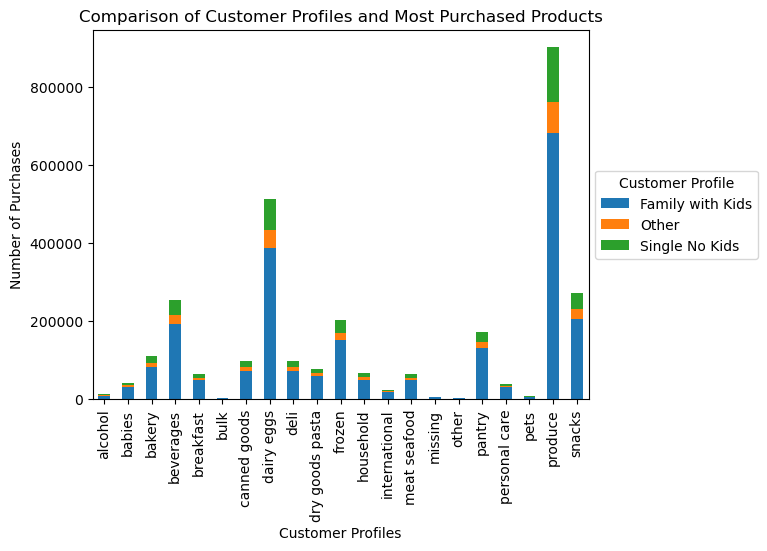

In [23]:
# Comparison of Customer profiles and Most purchased products in department

bar_customer_department = active_cus_dept.groupby('department')['Customer_Profile'].value_counts().unstack().fillna(0)
bar = bar_customer_department.plot(kind='bar', stacked=True)

plt.xlabel('Customer Profiles')
plt.ylabel('Number of Purchases')
plt.title('Comparison of Customer Profiles and Most Purchased Products')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Customer Profile')
plt.show()

In [24]:
# Save and export chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_department.png'),bbox_inches='tight')

# 9. Distribution of customer profiles by region

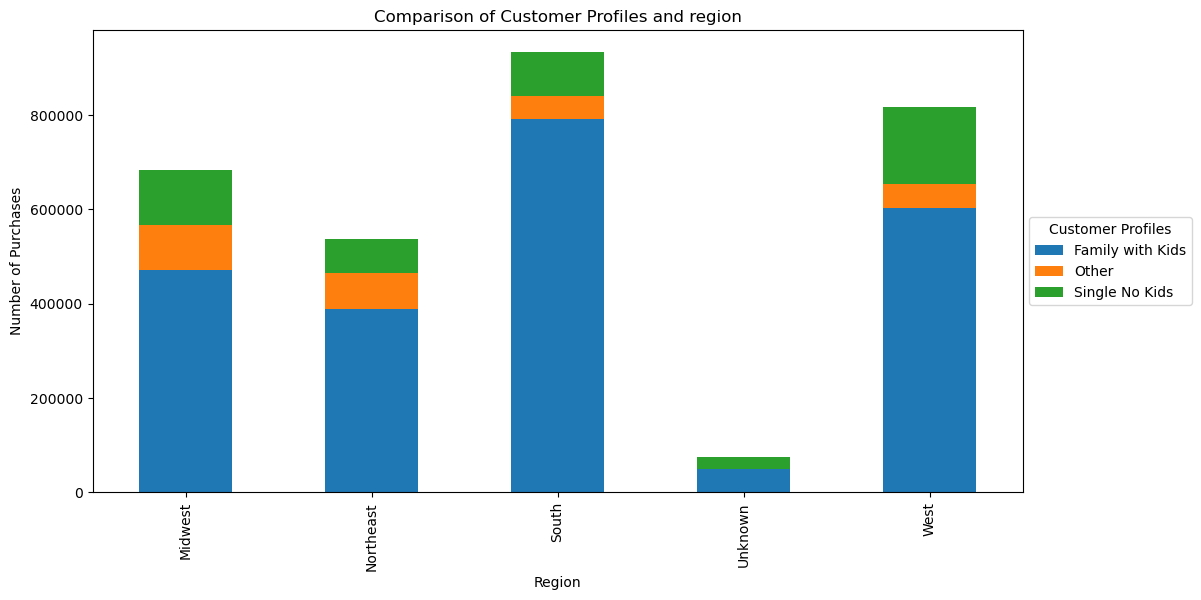

In [25]:
# Comparison of Customer profiles based on region

bar_customer_region = active_cus_dept.groupby('Region')['Customer_Profile'].value_counts().unstack().fillna(0)
bar= bar_customer_region.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Region')
plt.ylabel('Number of Purchases')
plt.title('Comparison of Customer Profiles and region')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Customer Profiles')
plt.show()

In [26]:
# Save and export chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_region.png'),bbox_inches='tight')

# 10. Create Line chart for Average Price of Items Bought by Day of Week				

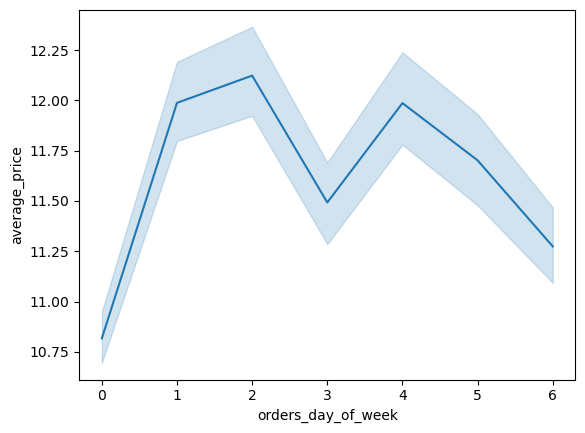

In [27]:
# Line chart to create average price for items bought by day of week

line = sns.lineplot(data = active_cus_dept, x = 'orders_day_of_week',y = 'average_price')

In [28]:
# Export Chart to save

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Line_average_price_weekly.png'),bbox_inches='tight')


# 11. Create pie chart for price range distribution

In [29]:
 # Categorize products into price ranges: low (<= $5), mid ($5-$15), high (>$15).

def create_profile(row):
    if row['prices'] <= 5:
        return 'low range product'
    elif 5 < row['prices'] <= 15: 
        return 'mid range products'
    elif row['prices'] > 15:
        return 'high range products'
    else:
        return 'Other'


In [30]:
# Create the price_range profile column with create_profile function to active_cus_Dept Dataframe. 
active_cus_dept['Price_range'] = active_cus_dept.apply(create_profile, axis=1)

In [31]:
# check the output

active_cus_dept['Price_range'].value_counts().sort_index()

Price_range
high range products      38505
low range product       949294
mid range products     2054610
Name: count, dtype: int64

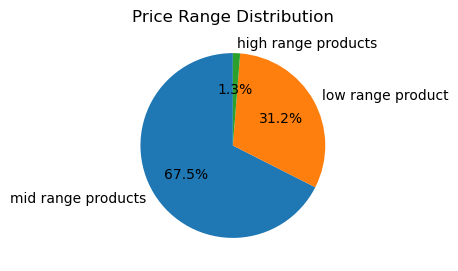

In [32]:
# active_cus_dept is the DataFrame and it has a 'Price_range' column with categories.
# The value_counts() for each price range category would look like the following:

price_range_counts = active_cus_dept['Price_range'].value_counts()


# Create a pie chart
pie= plt.figure(figsize=(3, 3))  # Set the figure size
plt.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Price Range Distribution')
plt.show()


In [33]:
# Export chart to file manager

pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_price_range.png'),bbox_inches='tight')

# 12 distribution of department by price range

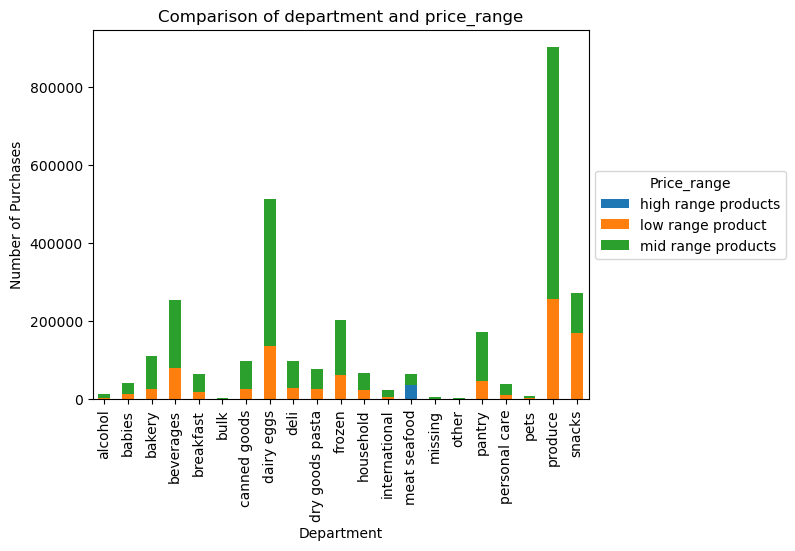

In [34]:
# Comparison of price-range products on each department

bar_price_department = active_cus_dept.groupby('department')['Price_range'].value_counts().unstack().fillna(0)
bar= bar_price_department.plot(kind='bar', stacked=True)
plt.xlabel('Department')
plt.ylabel('Number of Purchases')
plt.title('Comparison of department and price_range')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Price_range')
plt.show()

In [35]:
# Save and export chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_department.png'),bbox_inches='tight')

# 13. Distribution of customer profiles by price_range

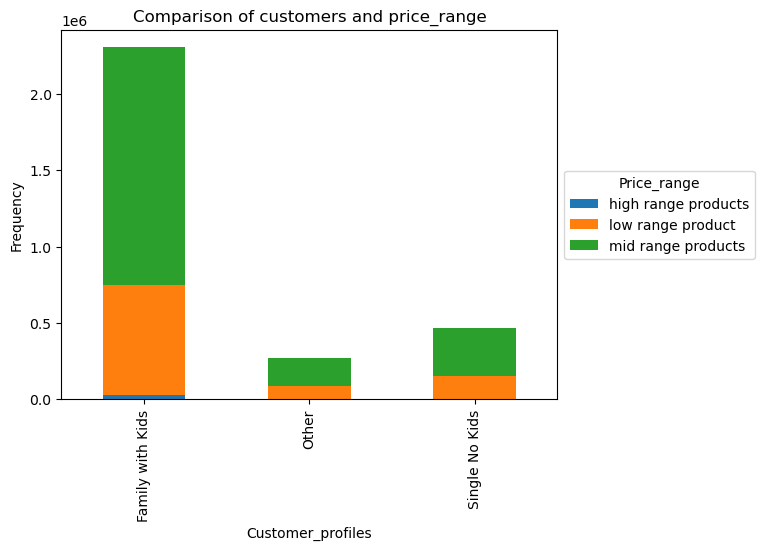

In [36]:
# Comparison of cus products on each department

bar_price_customer = active_cus_dept.groupby('Customer_Profile')['Price_range'].value_counts().unstack().fillna(0)
bar= bar_price_customer.plot(kind='bar', stacked=True)
plt.xlabel('Customer_profiles')
plt.ylabel('Frequency')
plt.title('Comparison of customers and price_range')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Price_range')
plt.show()

In [37]:
# Save and export chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Bar_price_customer.png'),bbox_inches='tight')

# 14. Distribution of ordering habits by regions

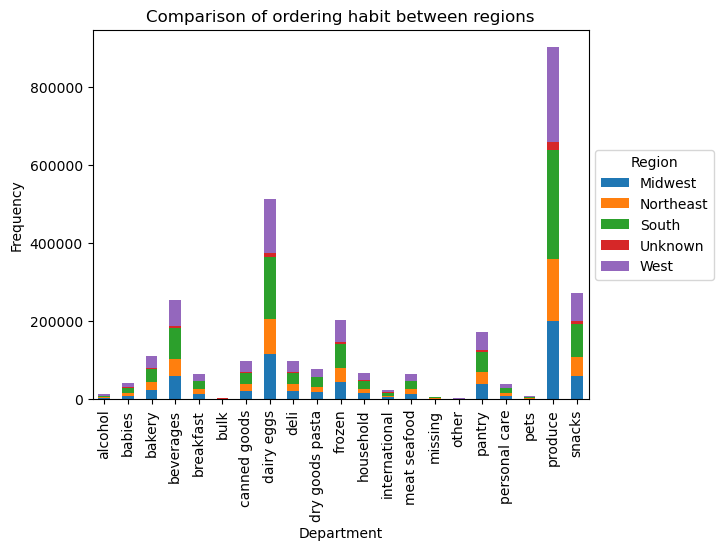

In [38]:
# Comparison of ordering habits between regions

bar_department_region = active_cus_dept.groupby('department')['Region'].value_counts().unstack().fillna(0)
bar= bar_department_region.plot(kind='bar', stacked=True)
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.title('Comparison of ordering habit between regions')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Region')
plt.show()

In [39]:
# Save and export chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Bar_region_department.png'),bbox_inches='tight')

# 15. Distribution of spenders by Region

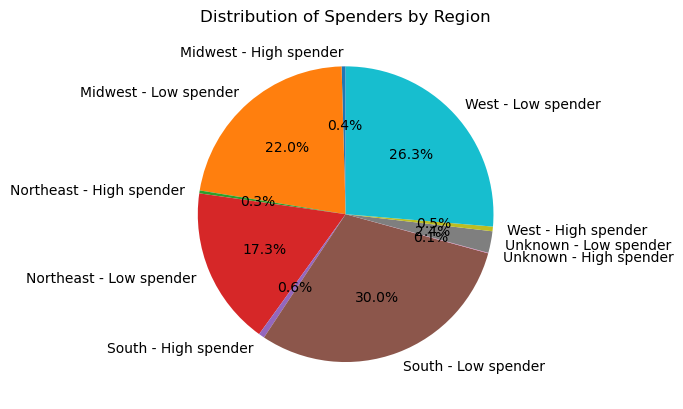

In [40]:
# We will create a pie chart based on the number of occurrences of each 'spender_flag' within each 'Region'

# First, we need to count the occurrences
spender_counts = active_cus_dept.groupby(['Region', 'spender_flag']).size()

# Now, we create a pie chart using these counts
pie= plt.figure()
plt.pie(spender_counts, labels=[f'{region} - {spender}' for region, spender in spender_counts.index], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Spenders by Region')
plt.show()

In [41]:
# Save and export chart

pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_spender_region.png'),bbox_inches='tight')

# 16. Create bar chart spending habits by loyalty status

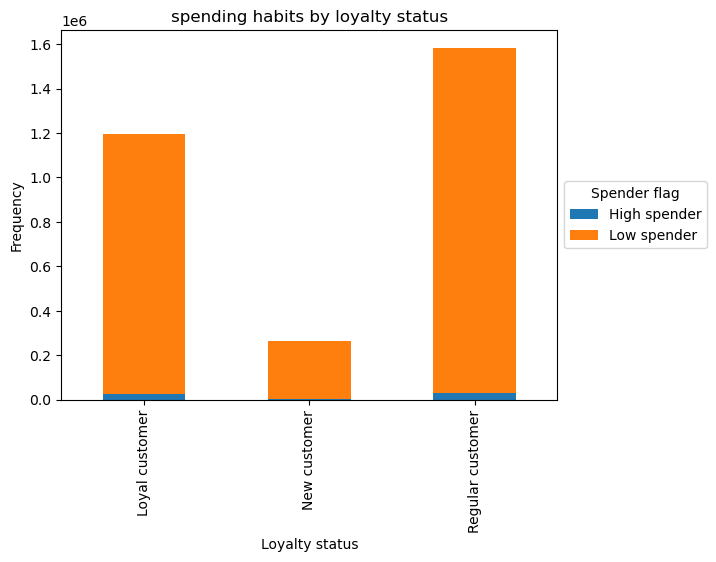

In [42]:
bar_loyalty_spender = active_cus_dept.groupby('loyalty_flag')['spender_flag'].value_counts().unstack().fillna(0)
bar= bar_loyalty_spender.plot(kind='bar', stacked=True)
plt.xlabel('Loyalty status')
plt.ylabel('Frequency')
plt.title('spending habits by loyalty status')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Spender flag')
plt.show()

In [43]:
# Save and export chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_spender.png'),bbox_inches='tight')

# 17. Average price of ordering habits based on loyalty status

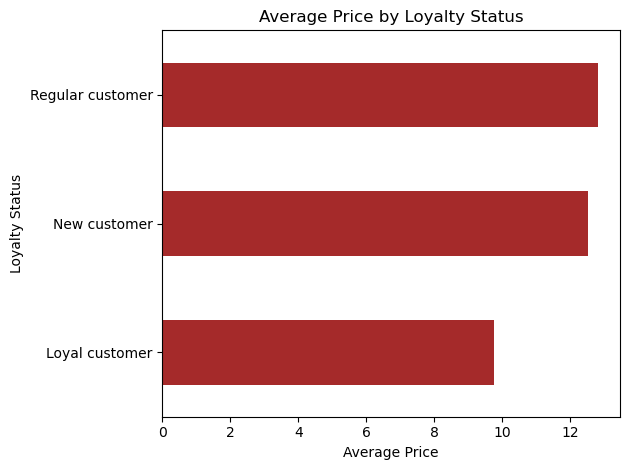

In [48]:
# Group by 'Loyalty_flag' and calculate the mean 'average_price' for each group
average_price_by_loyalty = active_cus_dept.groupby('loyalty_flag')['average_price'].mean()

# Plotting the results in a horizontal bar chart
bar = average_price_by_loyalty.plot(kind='barh', color='brown')

plt.title('Average Price by Loyalty Status')
plt.ylabel('Loyalty Status')
plt.xlabel('Average Price')

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()

In [49]:
# Save and export chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_average_price_loyalty_spender.png'),bbox_inches='tight')

# 18. Create bar chart for distribution of orders among users

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

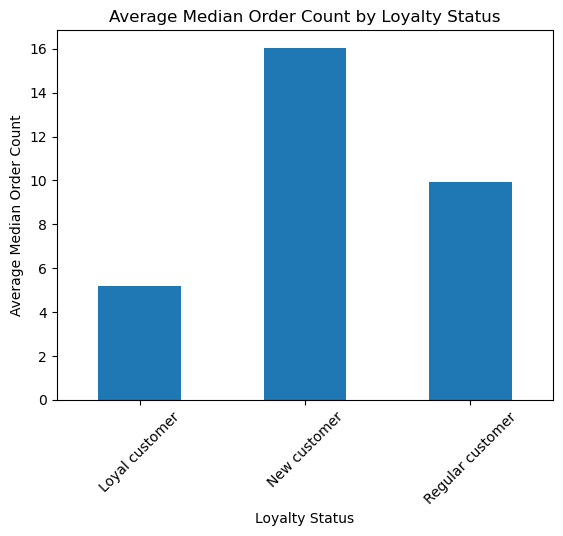

In [50]:
# Distribution chart among users in regards to their brand loyalty (how often do they return)
# Group by 'loyalty_flag' and calculate the mean 'median_order_prior' for each group

loyalty_order_stats = active_cus_dept.groupby('loyalty_flag')['median_days_since_prior_order'].mean()

# Plotting the results in a bar chart

bar = loyalty_order_stats.plot(kind='bar')

plt.title('Average Median Order Count by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Average Median Order Count')
plt.xticks(rotation=45)

In [51]:
# Save and export chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_average_median_order_loyalty.png'),bbox_inches='tight')

# 19. Distribution of users by frequency_flag and loyalty status

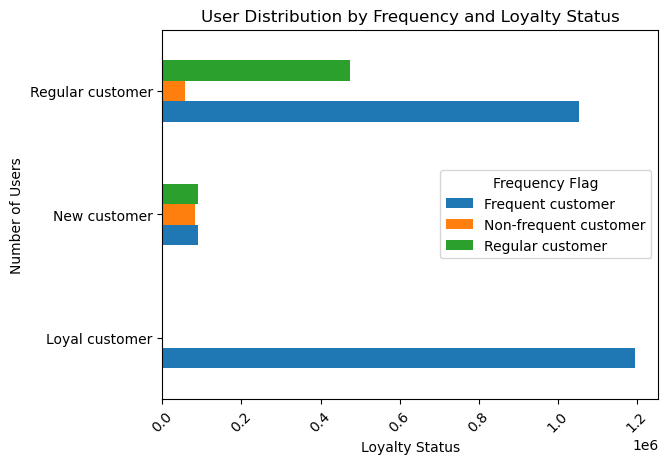

In [52]:
# To analyze the distribution of users by frequency_flag within each loyalty_flag

# Group the data by 'loyalty_flag' and 'frequency_flag' and count the occurrences
loyalty_frequency_distribution = active_cus_dept.groupby(['loyalty_flag', 'order_frequency_flag']).size().unstack()

# Plotting the grouped bar chart
bar=loyalty_frequency_distribution.plot(kind='barh', stacked=False)

plt.title('User Distribution by Frequency and Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Frequency Flag')

In [58]:
# Save and export chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_frequency_distribution.png'),bbox_inches='tight')

In [47]:
# Descriptive statistics analysis for average_price

active_cus_dept['average_price'].describe()

count    3.042409e+06
mean     1.159050e+01
std      6.696494e+01
min      1.300000e+00
25%      7.400000e+00
50%      7.824000e+00
75%      8.240000e+00
max      7.416000e+03
Name: average_price, dtype: float64

# 20. Distribution chart for customer_profile and day of week

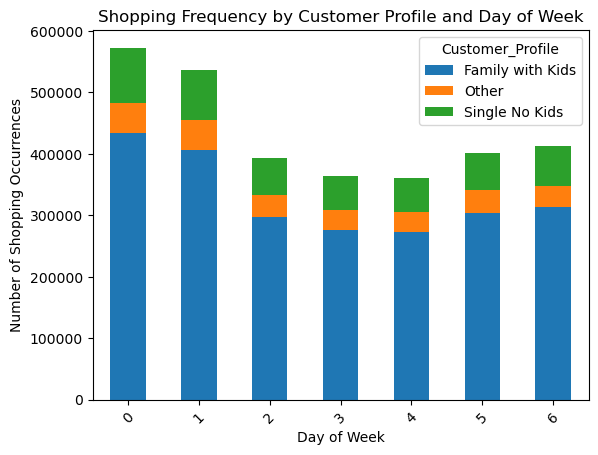

In [57]:
#we count and compare the order of each customer profile on days of week.

# Grouping the data by 'customer_profile' and 'day_number' and counting occurrences

profile_day_counts = active_cus_dept.groupby(['orders_day_of_week', 'Customer_Profile']).size().unstack()

# Plotting the bar chart

bar=profile_day_counts.plot(kind='bar', stacked=True)

plt.title('Shopping Frequency by Customer Profile and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Shopping Occurrences')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Customer_Profile')

plt.show()


In [59]:
# Save and export chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_day_counts.png'),bbox_inches='tight')

In [53]:
active_cus_dept.head()

,user_id,STATE,Age,number_of_dependents,family_status,income,order_id,order_number,orders_day_of_week,order_hour,...,max_order,loyalty_flag,average_price,spender_flag,median_days_since_prior_order,order_frequency_flag,Region,department,Customer_Profile,Price_range
0,59,Delaware,49,2,married,71218,78,16,1,15,...,37,Regular customer,7.004,Low spender,7.0,Frequent customer,South,household,Family with Kids,mid range products
1,27,New York,81,0,divorced/widowed,110170,-84,8,0,10,...,44,Loyal customer,7.996,Low spender,7.0,Frequent customer,Northeast,household,Other,low range product
2,77,New Mexico,75,1,married,122006,-102,20,2,11,...,92,Loyal customer,7.330,Low spender,4.0,Frequent customer,West,household,Family with Kids,low range product
3,125,Nevada,26,1,married,53586,30,13,6,12,...,33,Regular customer,8.390,Low spender,10.0,Frequent customer,West,household,Family with Kids,mid range products
4,4,Arkansas,31,3,married,45435,-27,7,6,13,...,17,Regular customer,6.426,Low spender,7.0,Frequent customer,South,household,Family with Kids,mid range products


# 21. Create a profile for age group 

In [60]:
#Categorize individuals into age groups.
# Returns:- str: Age group category ('Young adult', 'Middle age', or 'Senior') based on 'Age' column.
        
def create_profile(row):
    if row['Age'] <= 35:
        return 'Young adult'
    elif 35 < row['Age'] <= 60: 
        return 'Middle age'
    else:
        return 'Senior'


In [61]:
active_cus_dept['Age_Group'] = active_cus_dept.apply(create_profile, axis=1)


In [62]:
# get the value counts for each age group category

active_cus_dept['Age_Group'].value_counts()

Age_Group
Middle age     1200630
Senior         1072260
Young adult     769519
Name: count, dtype: int64

In [63]:
active_cus_dept.head()

,user_id,STATE,Age,number_of_dependents,family_status,income,order_id,order_number,orders_day_of_week,order_hour,...,loyalty_flag,average_price,spender_flag,median_days_since_prior_order,order_frequency_flag,Region,department,Customer_Profile,Price_range,Age_Group
0,59,Delaware,49,2,married,71218,78,16,1,15,...,Regular customer,7.004,Low spender,7.0,Frequent customer,South,household,Family with Kids,mid range products,Middle age
1,27,New York,81,0,divorced/widowed,110170,-84,8,0,10,...,Loyal customer,7.996,Low spender,7.0,Frequent customer,Northeast,household,Other,low range product,Senior
2,77,New Mexico,75,1,married,122006,-102,20,2,11,...,Loyal customer,7.330,Low spender,4.0,Frequent customer,West,household,Family with Kids,low range product,Senior
3,125,Nevada,26,1,married,53586,30,13,6,12,...,Regular customer,8.390,Low spender,10.0,Frequent customer,West,household,Family with Kids,mid range products,Young adult
4,4,Arkansas,31,3,married,45435,-27,7,6,13,...,Regular customer,6.426,Low spender,7.0,Frequent customer,South,household,Family with Kids,mid range products,Young adult


In [79]:
# make a descriptive statistics analysis of age column

active_cus_dept['Age'].describe()

count    3.042409e+06
mean     5.178542e+01
std      1.848017e+01
min      1.800000e+01
25%      3.400000e+01
50%      5.400000e+01
75%      6.700000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [65]:
active_cus_dept.shape

(3042409, 35)

# 22. Create bar chart for department purchases by Age Group

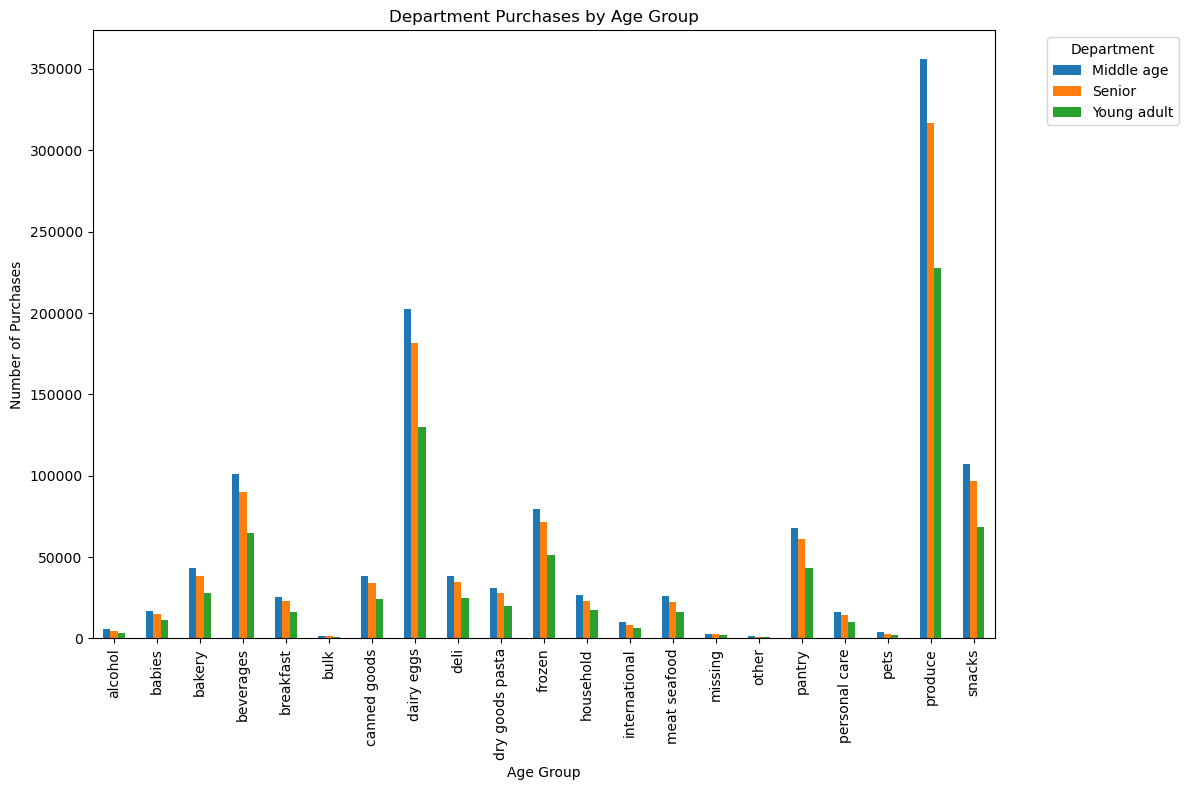

In [76]:
# Group by 'age_group' and 'department', count the occurrences, and unstack the 'department' level
# so that we get a separate column for each department

department_purchases_by_age_group = active_cus_dept.groupby(['department', 'Age_Group']).size().unstack(fill_value=0)

# Now we can plot this as a bar chart
bar=department_purchases_by_age_group.plot(kind='bar', figsize=(12, 8), stacked=False)

plt.title('Department Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend out of the plot
plt.tight_layout()  # Adjust the layout to make room for the legend

plt.show()

In [77]:
# Save and export chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_purchases_by_age_group.png'),bbox_inches='tight')

# 23. Create bar chart  Customer Profile within Age Groups

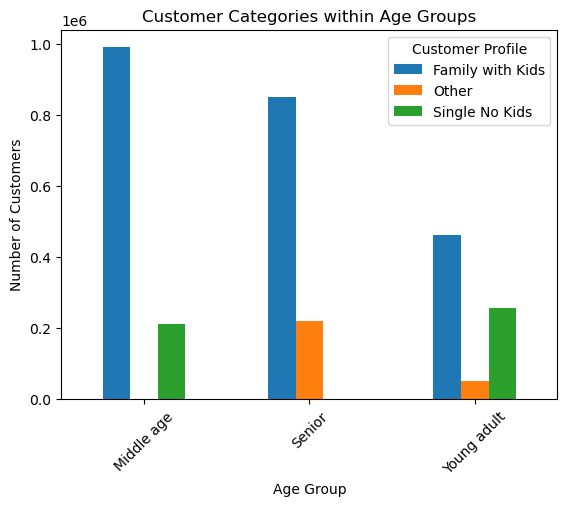

In [74]:
# Group the data by 'age_group' and 'customer_profile', and count the occurrences

age_profile_counts = active_cus_dept.groupby(['Age_Group', 'Customer_Profile']).size().unstack()

# Plotting the bar chart
bar=age_profile_counts.plot(kind='bar', stacked=False)

plt.title('Customer Categories within Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Customer Profile')

In [83]:
# Save and export chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_profile.png'),bbox_inches='tight')

# 24. Create scatter plot to compare income within Age-Group

In [81]:
# make a descriptive statistics analysis of income column

active_cus_dept['income'].describe()

count    3.042409e+06
mean     9.388314e+04
std      3.956619e+04
min      2.996000e+04
25%      5.856900e+04
50%      9.218200e+04
75%      1.237230e+05
max      1.688910e+05
Name: income, dtype: float64

Text(0.5, 1.0, 'spending power by Age')

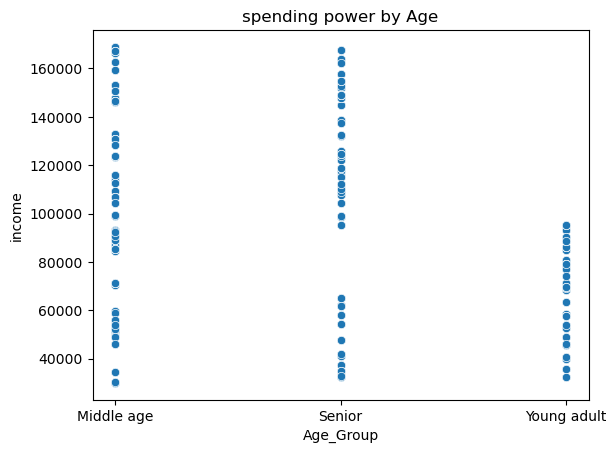

In [80]:
# Make a scatter plot to compare spending power within age-group

scatter=sns.scatterplot(x = 'Age_Group', y = 'income',data = active_cus_dept)
plt.title('spending power by Age')

In [82]:
#Save chart

scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_income_age_group.png'),bbox_inches='tight')

In [84]:
active_cus_dept.head()

,user_id,STATE,Age,number_of_dependents,family_status,income,order_id,order_number,orders_day_of_week,order_hour,...,loyalty_flag,average_price,spender_flag,median_days_since_prior_order,order_frequency_flag,Region,department,Customer_Profile,Price_range,Age_Group
0,59,Delaware,49,2,married,71218,78,16,1,15,...,Regular customer,7.004,Low spender,7.0,Frequent customer,South,household,Family with Kids,mid range products,Middle age
1,27,New York,81,0,divorced/widowed,110170,-84,8,0,10,...,Loyal customer,7.996,Low spender,7.0,Frequent customer,Northeast,household,Other,low range product,Senior
2,77,New Mexico,75,1,married,122006,-102,20,2,11,...,Loyal customer,7.330,Low spender,4.0,Frequent customer,West,household,Family with Kids,low range product,Senior
3,125,Nevada,26,1,married,53586,30,13,6,12,...,Regular customer,8.390,Low spender,10.0,Frequent customer,West,household,Family with Kids,mid range products,Young adult
4,4,Arkansas,31,3,married,45435,-27,7,6,13,...,Regular customer,6.426,Low spender,7.0,Frequent customer,South,household,Family with Kids,mid range products,Young adult


# 25. Export Dataframe to Pickle

In [85]:
# Export active_customers_departs dataframe as 'merged_final.pkl'

active_cus_dept.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Merged_final_dataset.pkl'))
